In [1]:
#Import the Required Libraries
import numpy as np
import pandas as pd #Data into Structure
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading of the File of given Datset
data = pd.read_csv('winequality-red.csv')

In [3]:
#Visualization of top 5 Records inside my data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Classes of target value - quality
set(data.quality)

{3, 4, 5, 6, 7, 8}

In [5]:
#Description of the given Dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#To check the missing value
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

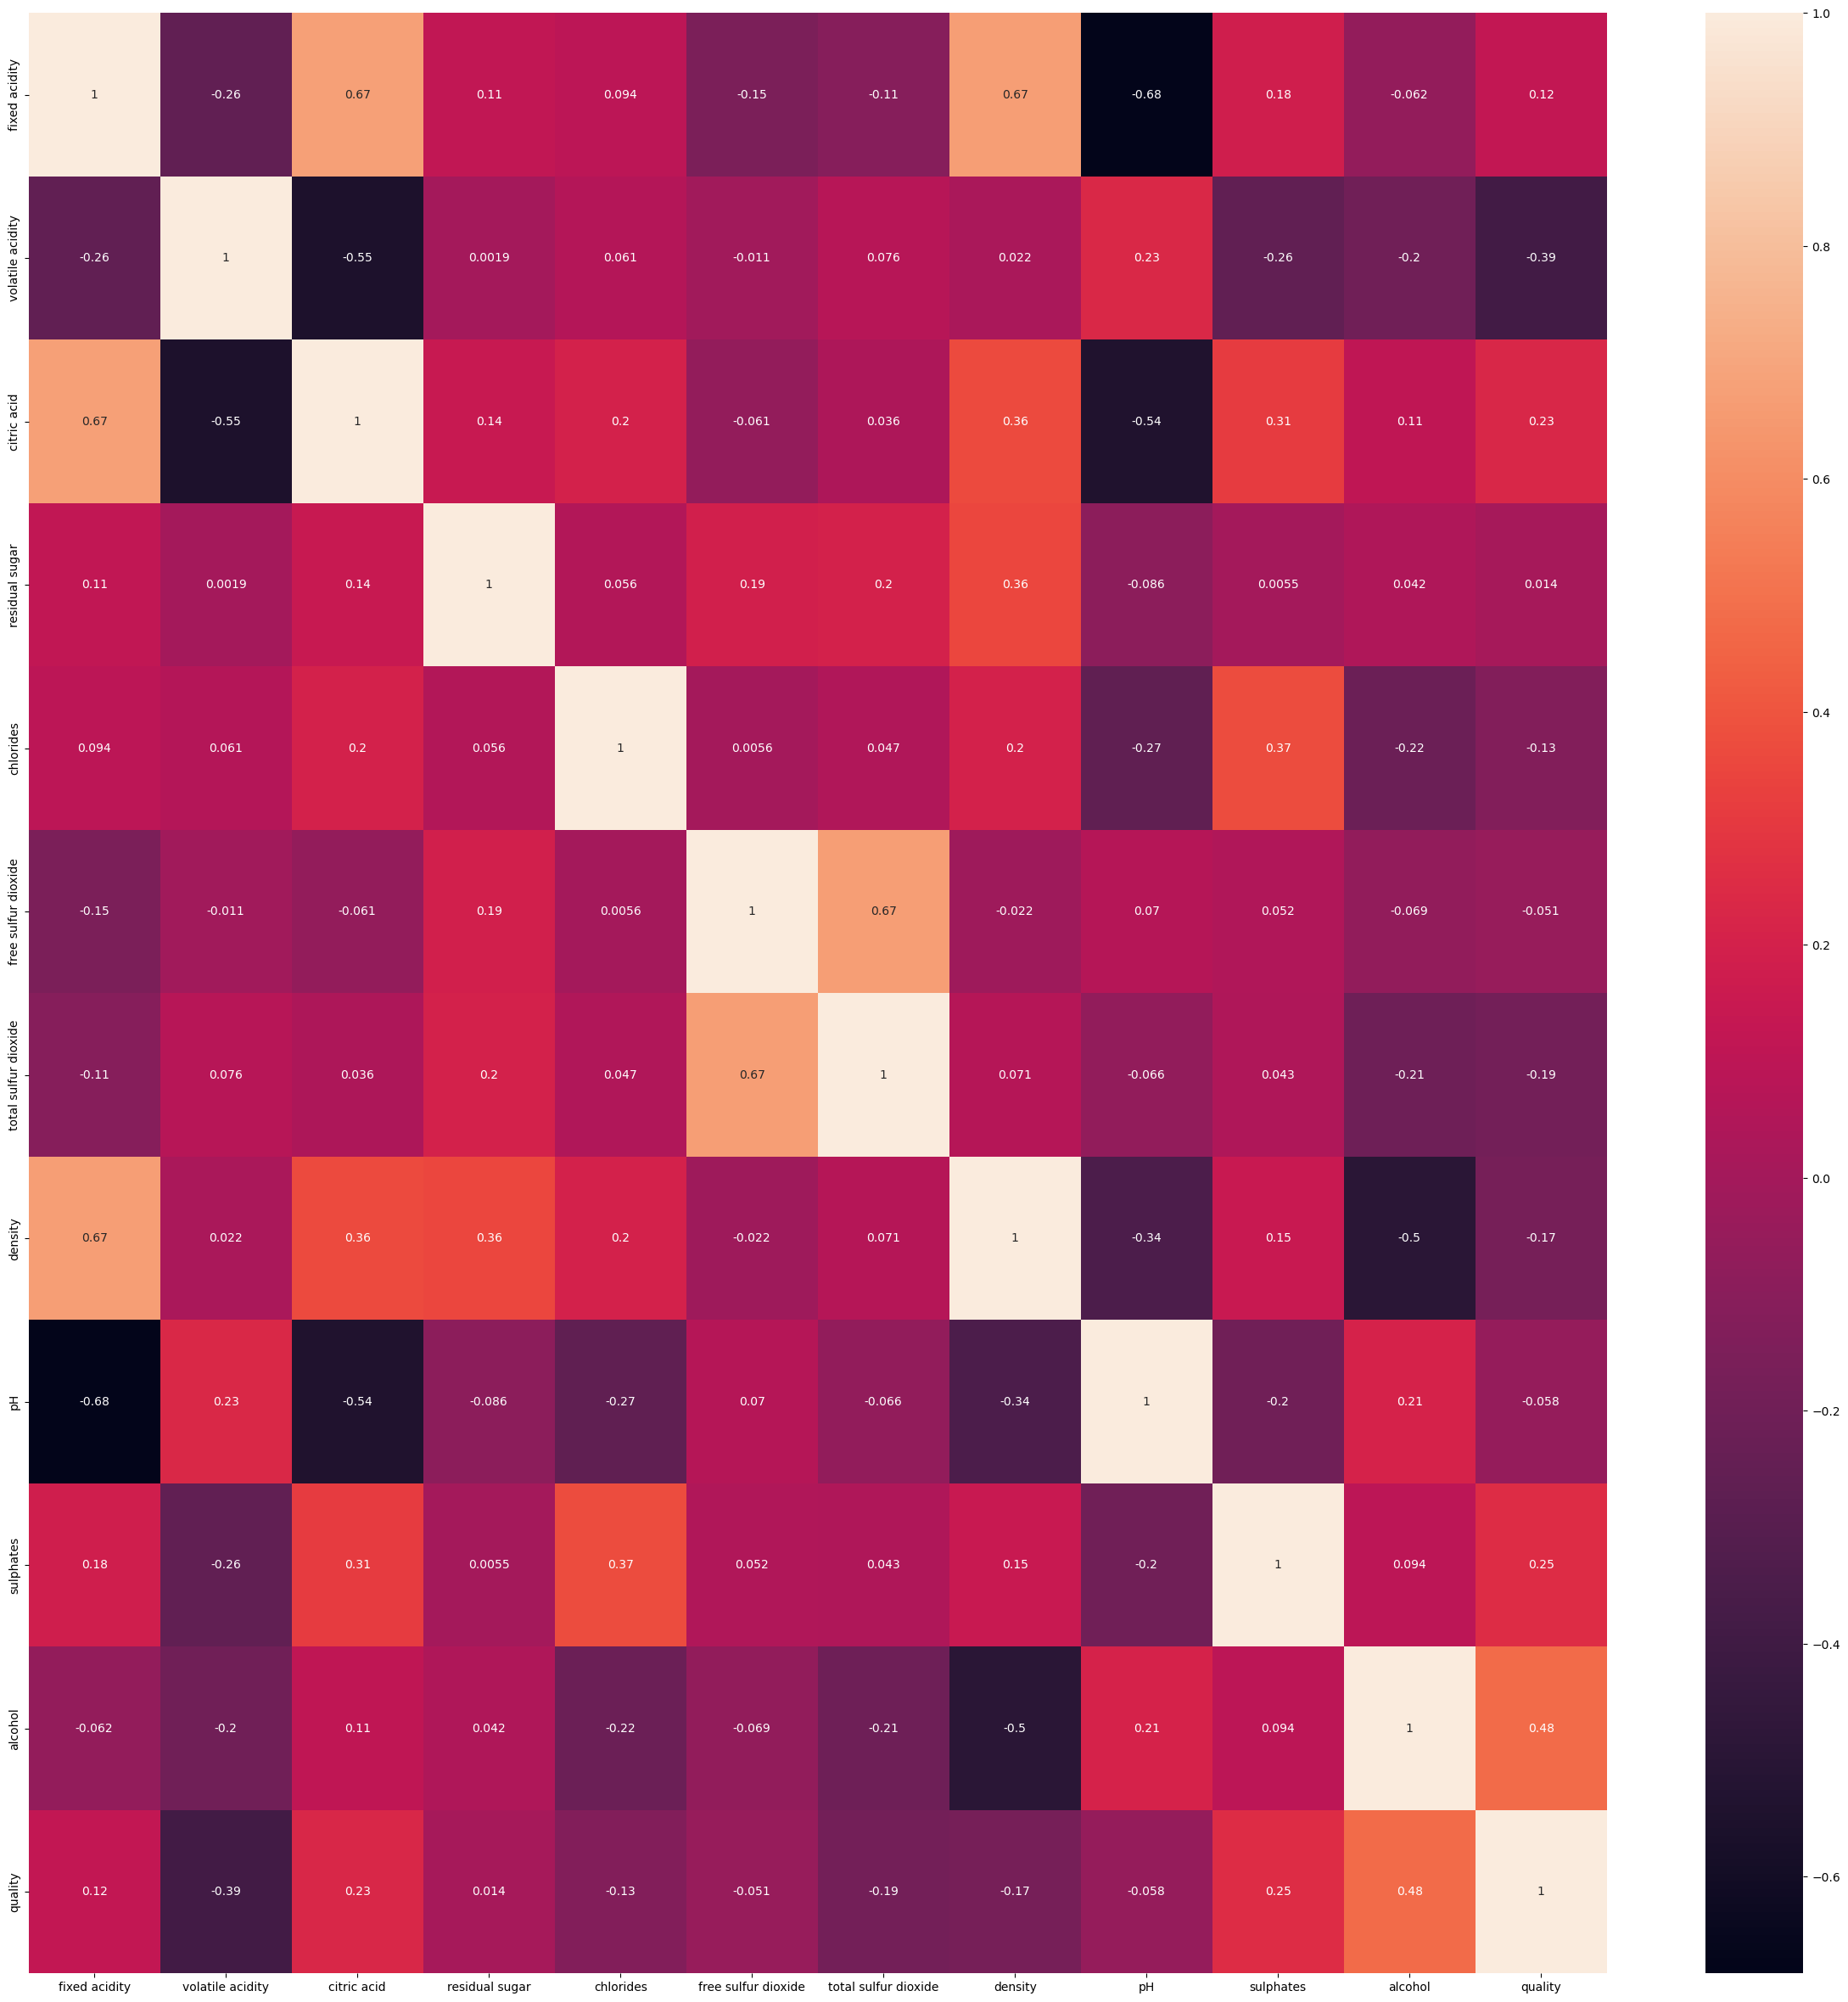

In [14]:
#Coorelation Matrix among all features inside the dataset
plt.figure(figsize=(30,30))
corr = data.corr()
sns.heatmap(corr,annot = True)
plt.savefig("Correlation Matrix.png")
plt.show()

In [15]:
#Detection of the Outliers using Z-Score
!pip install scipy
from scipy import stats
z= np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [16]:
#If z>3 (Threshold) -> This is an Outlier
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [17]:
#Remove those records whose z>3 (Outlier)
new_data = data[(z<3).all(axis=1)]

In [18]:
new_data.shape

(1451, 12)

In [19]:
data.shape

(1599, 12)

In [20]:
#Data Spliting into feature(X) and Target column(Y)
from sklearn.model_selection import train_test_split #For Spliting the data into Train and Test
x = new_data.drop(columns = 'quality')
y = new_data['quality']

In [21]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [22]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [37]:
#Data Modeling using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators=100)

In [38]:
print(type(y_train))
print(type(x_train))



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
rf_classificationModel.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
#Prediction of data using Random Forest Model
y_pred = rf_classificationModel.predict(x_test)

In [41]:
print(y_pred)

[6 6 6 5 5 6 5 5 7 6 5 6 5 5 6 6 5 6 5 5 5 6 6 5 5 6 6 6 5 6 6 5 5 6 5 5 6
 5 5 5 5 5 6 7 6 6 5 5 5 7 5 6 6 7 7 5 5 5 6 5 7 6 5 5 6 5 5 5 6 6 7 7 5 6
 5 6 5 6 5 6 6 5 6 5 6 5 5 7 6 5 5 6 5 6 5 7 5 5 6 6 5 5 6 5 6 5 6 5 5 6 5
 5 5 5 5 6 7 5 5 7 6 6 5 5 5 6 6 5 5 5 7 6 5 6 6 5 5 5 6 6 5 5 7 6 5 5 5 6
 5 5 5 5 6 5 6 5 6 6 6 6 6 5 5 7 5 5 6 6 5 5 5 5 5 6 5 6 5 5 5 5 6 7 6 6 6
 5 6 5 7 6 5 6 7 5 5 5 5 6 6 5 6 6 6 5 5 6 6 6 5 5 6 5 6 5 5 6 7 7 5 6 5 5
 5 5 5 6 5 6 5 5 5 6 5 6 6 6 6 5 7 6 5 7 5 5 5 5 5 5 5 6 6 6 5 6 6 6 6 6 6
 6 5 5 6 5 7 5 6 7 6 6 5 5 6 5 6 5 5 6 6 6 6 5 6 6 7 5 6 6 6 6 7]


In [42]:
y_pred

array([6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 7, 7, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7,
       6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 7, 5, 5, 5, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 7, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5, 7,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5,
       6, 6, 6, 6, 7])

In [44]:
#Data Evaluation on Metrics
from sklearn import metrics
print('Accuracy score ', metrics.accuracy_score(y_test,y_pred))

Accuracy score  0.6838487972508591


[Text(0.5433556255453752, 0.9705882352941176, 'x[9] <= 0.685\ngini = 0.635\nsamples = 724\nvalue = [31, 484, 483, 150, 12]'),
 Text(0.29297215859511344, 0.9117647058823529, 'x[7] <= 0.996\ngini = 0.587\nsamples = 501\nvalue = [30, 407, 315, 53, 1]'),
 Text(0.11206779013961606, 0.8529411764705882, 'x[3] <= 1.85\ngini = 0.606\nsamples = 202\nvalue = [13, 121, 169, 33, 0]'),
 Text(0.049738219895287955, 0.7941176470588235, 'x[10] <= 10.45\ngini = 0.596\nsamples = 80\nvalue = [2, 64, 41, 15, 0]'),
 Text(0.028795811518324606, 0.7352941176470589, 'x[7] <= 0.996\ngini = 0.372\nsamples = 46\nvalue = [2, 49, 13, 0, 0]'),
 Text(0.019197207678883072, 0.6764705882352942, 'x[4] <= 0.061\ngini = 0.305\nsamples = 43\nvalue = [1, 49, 10, 0, 0]'),
 Text(0.010471204188481676, 0.6176470588235294, 'x[4] <= 0.058\ngini = 0.5\nsamples = 7\nvalue = [0, 6, 6, 0, 0]'),
 Text(0.006980802792321117, 0.5588235294117647, 'x[2] <= 0.19\ngini = 0.245\nsamples = 5\nvalue = [0, 6, 1, 0, 0]'),
 Text(0.0034904013961605585

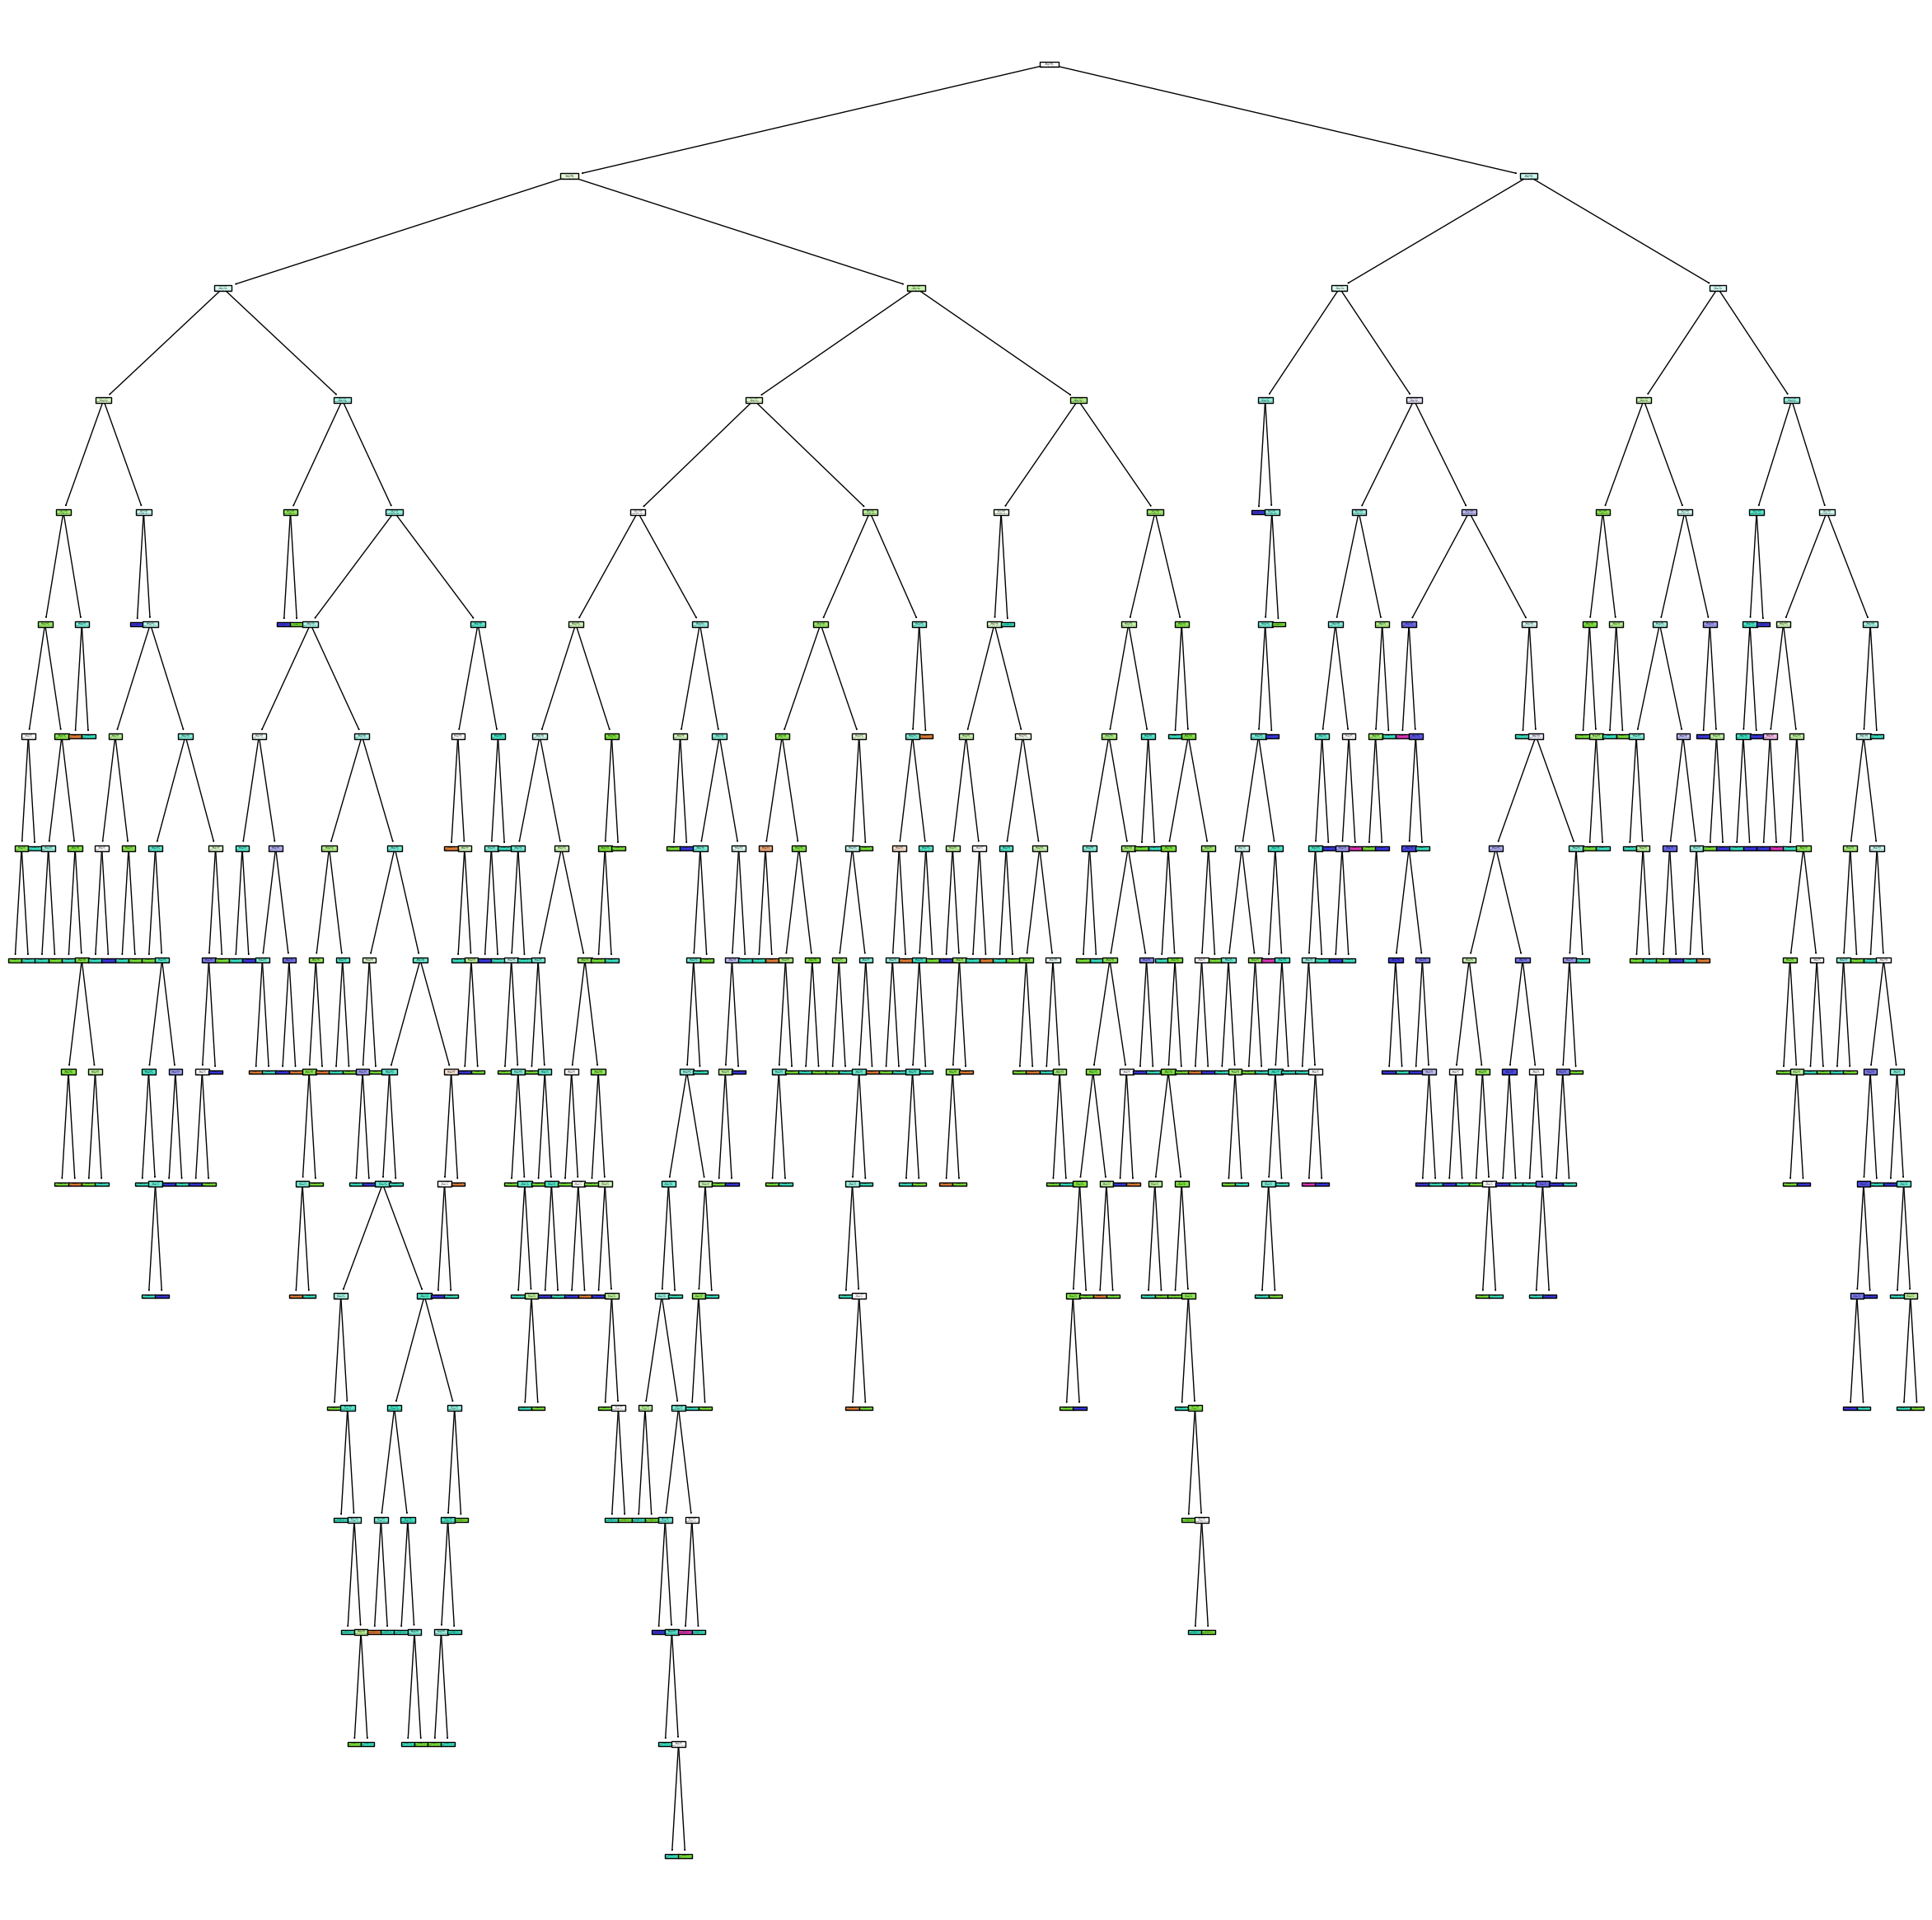

In [47]:
plt.figure(figsize=(30,30))

from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0],filled=True)

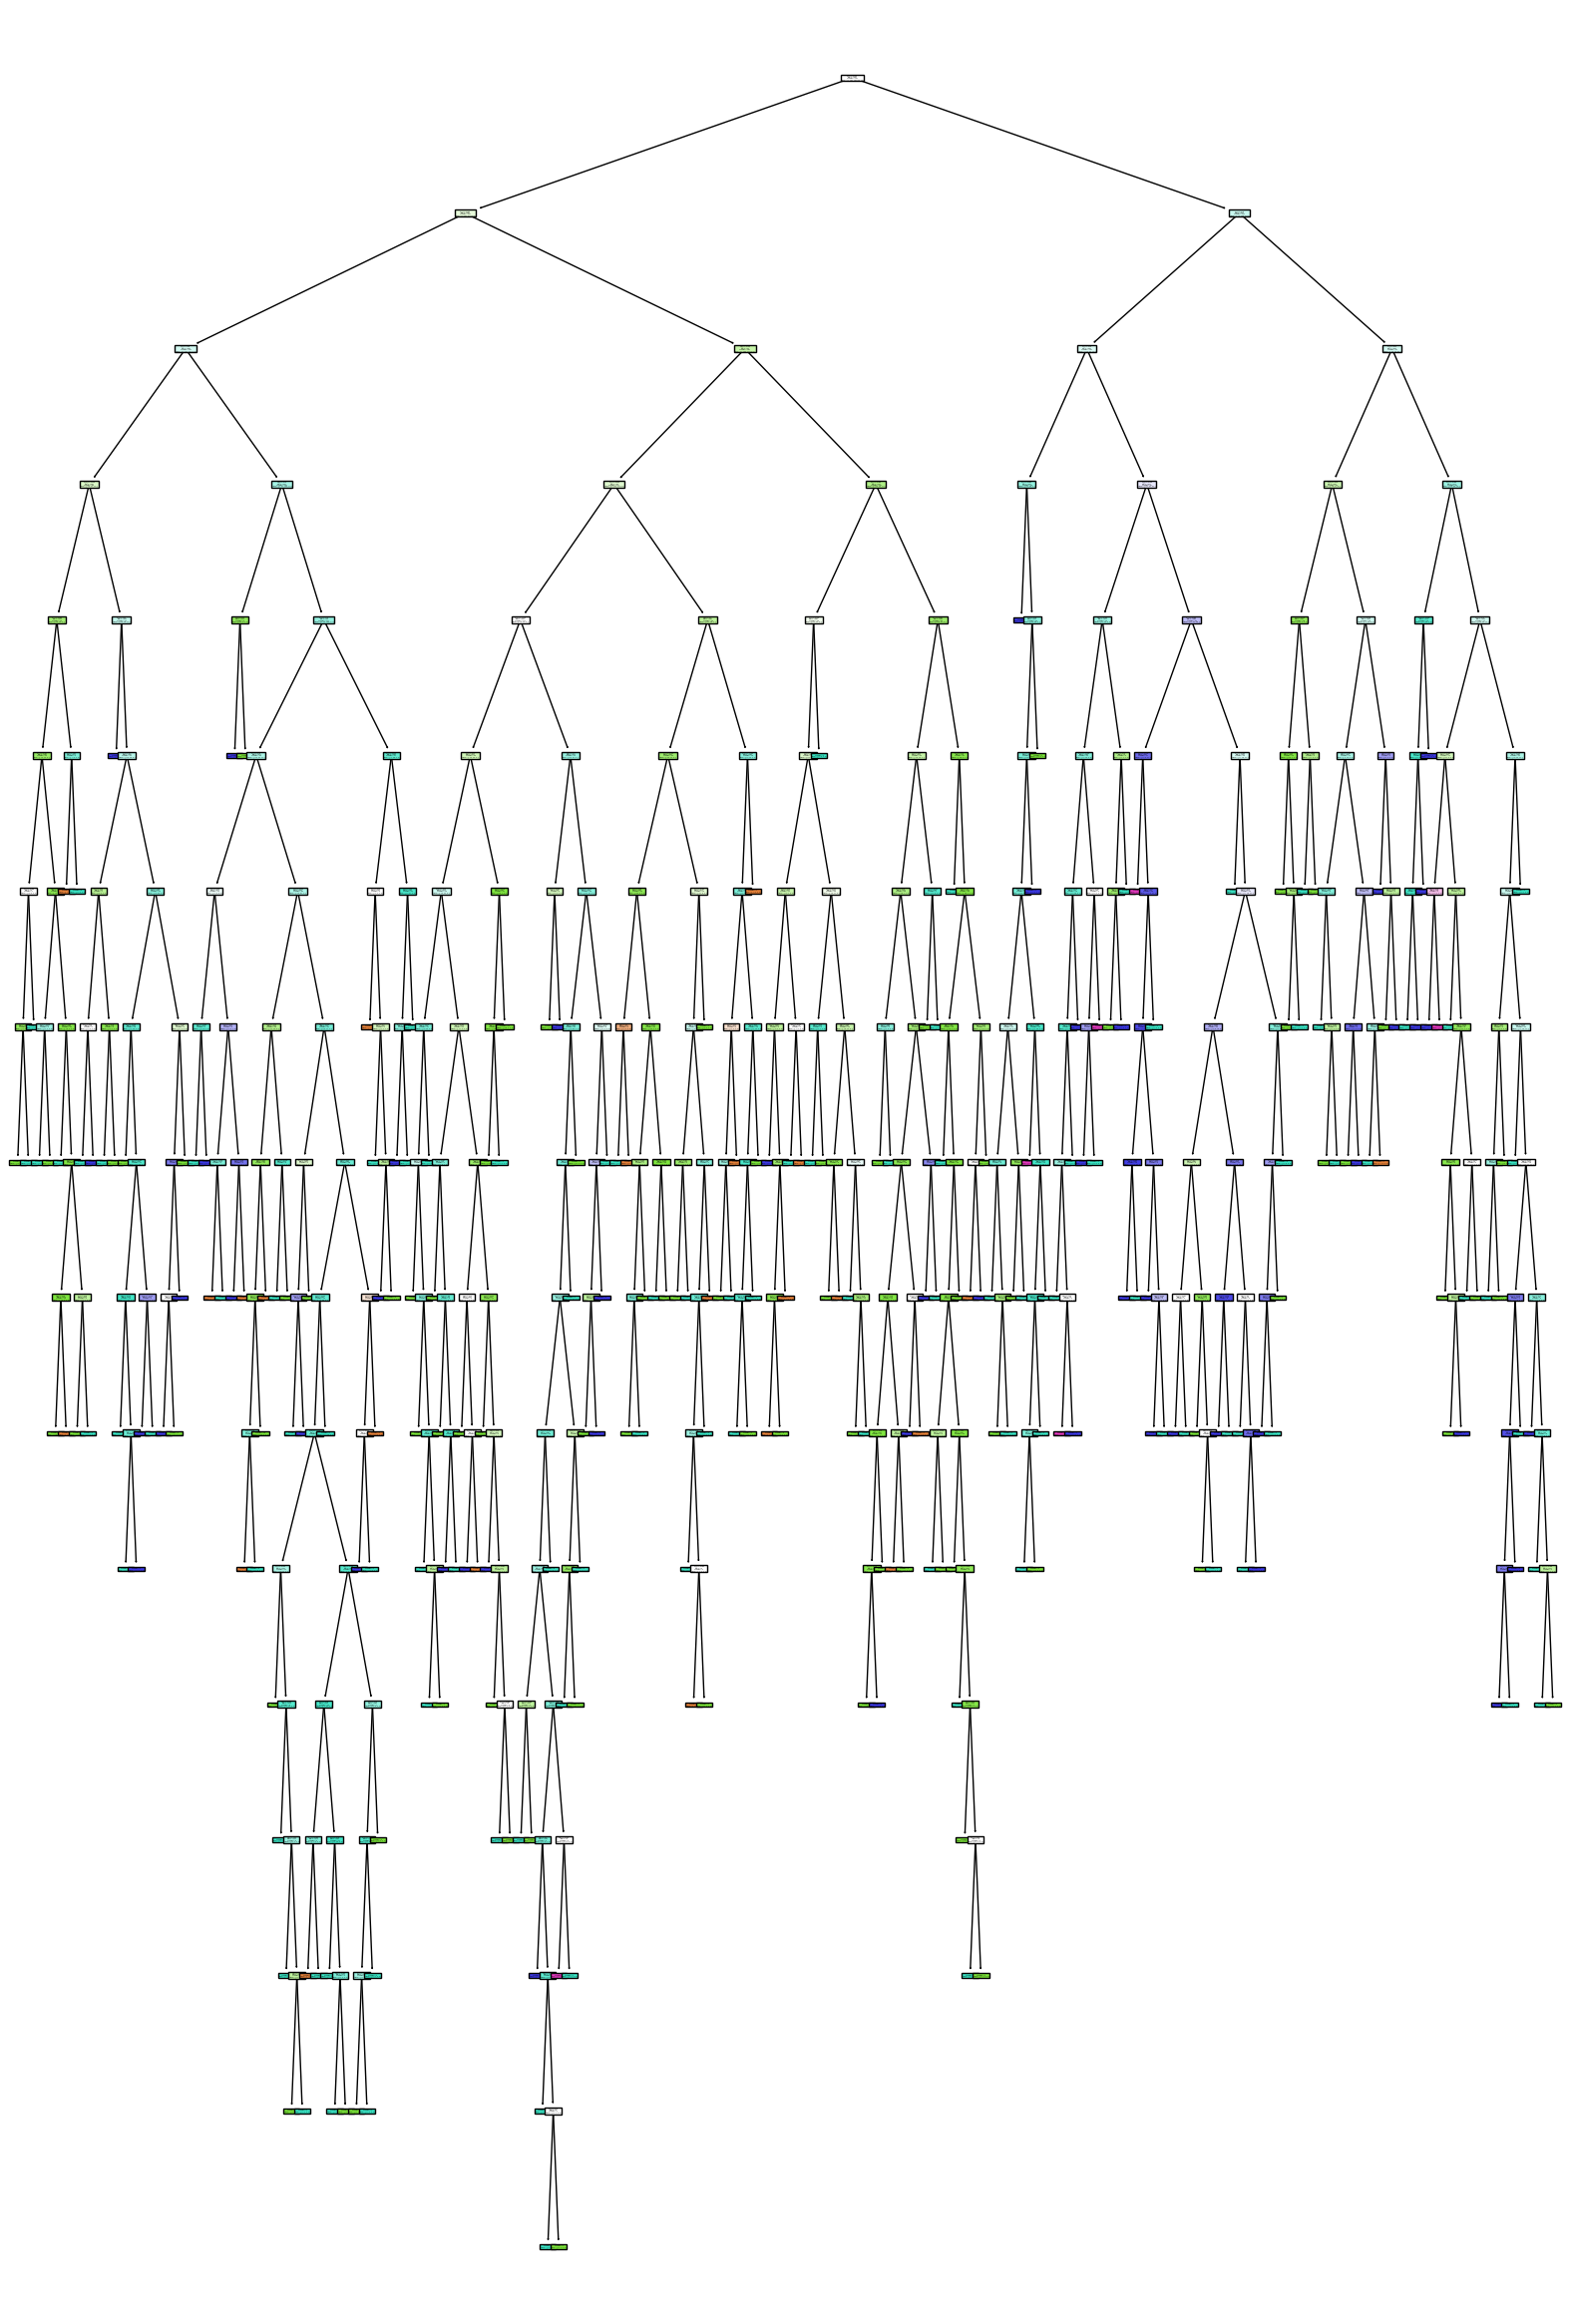

In [46]:
plt.figure(figsize=(20,30))
for i in range(len(rf_classificationModel.estimators_)):
    tree.plot_tree(rf_classificationModel.estimators_[0],filled=True)
